# `SimpleBagging` Classifier

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

sns.set(rc={'figure.figsize':(7.5,5)})

### Create Toy Dataset

`sklearn.datasets.make_moons`: Make two interleaving half circles. A simple toy dataset to visualize clustering and classification algorithms. [More](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

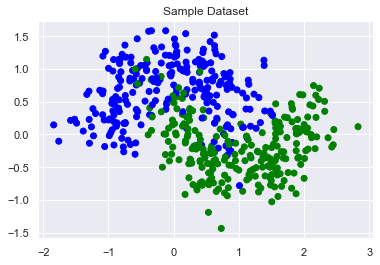

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons

X, y = make_moons(500, noise=0.3, random_state=0x1701a)

plt.scatter(X[:, 0], X[:, 1], cmap = ListedColormap(['blue', 'green']), c=y)
plt.title("Sample Dataset")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25, random_state=32
)

Import a function to plot the decision boundary train/test points for bagging

In [4]:
from modeling_helper import dt_plot_surface, bag_plot_surface

Let's start again by trying a decision tree with no hyperparameters on the new dataset

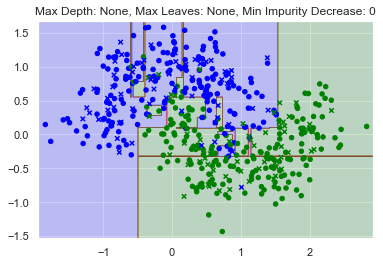

^^^ Train accuracy: 1.0, Test accuracy: 0.86 ^^^


In [5]:
dt_plot_surface(X_train, X_test, y_train, y_test)

## Bagging

Bagging = "Bootstrap Aggregating"

This is another **ensemble** method. Meaning we stack a bunch of trees together. But unlike extra tres, Bagging works by sampling.

Given a dataset $D$ with $n$ samples in it:
- Separate it into $m$ different random samples with replacement: $D_m$
- Train $m$ models $f_m$ on the sampled datasets $D_m$
- Produce the final prediction by either: 
    - Averaging $f_m$ for regression problems
    - Voting with $f_m$ for classification problems
    
Because we're fitting the model on samples of the data, the randomization we introduce will reduce error by decreasing variance.

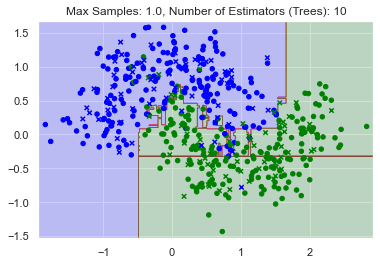

^^^ Train accuracy: 0.99, Test accuracy: 0.87 ^^^


In [6]:
bag_plot_surface(X_train, X_test, y_train, y_test)

### Hyperparameters

#### Max Samples

This decides the size of our bootstrap samples. We can enter a number, or a fraction.

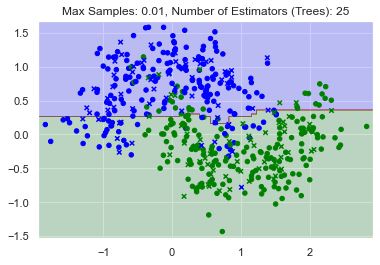

^^^ Train accuracy: 0.8, Test accuracy: 0.83 ^^^


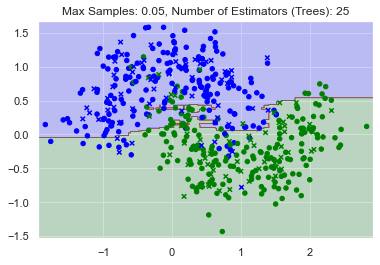

^^^ Train accuracy: 0.87, Test accuracy: 0.87 ^^^


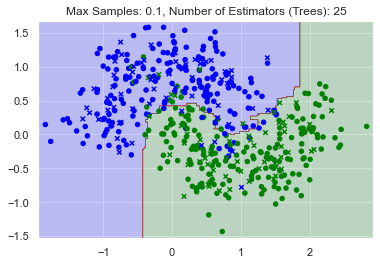

^^^ Train accuracy: 0.93, Test accuracy: 0.9 ^^^


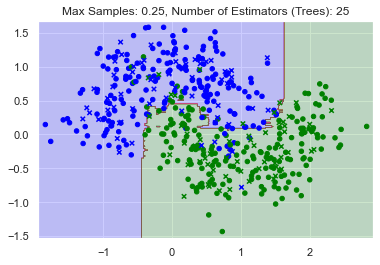

^^^ Train accuracy: 0.95, Test accuracy: 0.9 ^^^


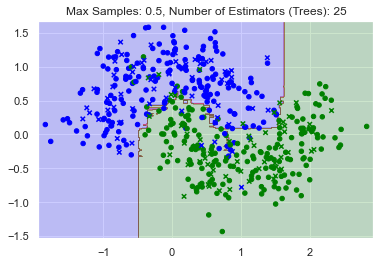

^^^ Train accuracy: 0.97, Test accuracy: 0.9 ^^^


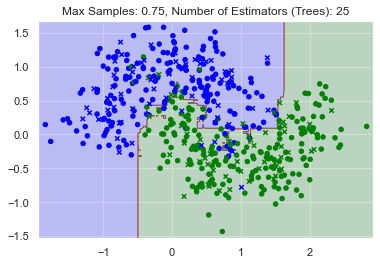

^^^ Train accuracy: 0.99, Test accuracy: 0.9 ^^^


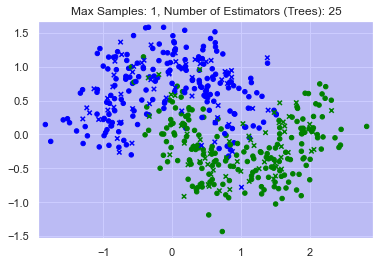

^^^ Train accuracy: 0.5, Test accuracy: 0.5 ^^^


In [7]:
for samp_frac in [.01, .05, .1, .25, .5, .75, 1]:
    bag_plot_surface(X_train, X_test, y_train, y_test, max_samples=samp_frac, n_estimators=25)

#### N_estimators

How many trees should we build and average?

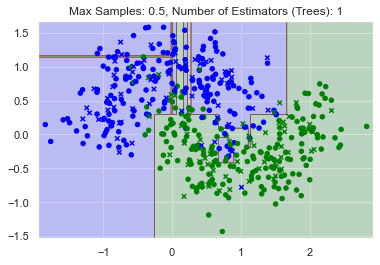

^^^ Train accuracy: 0.93, Test accuracy: 0.86 ^^^


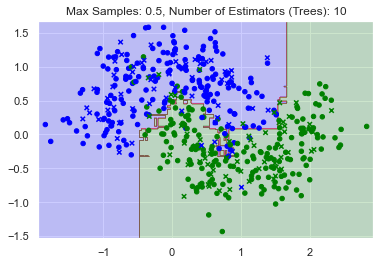

^^^ Train accuracy: 0.96, Test accuracy: 0.89 ^^^


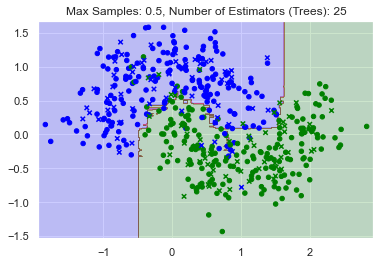

^^^ Train accuracy: 0.97, Test accuracy: 0.9 ^^^


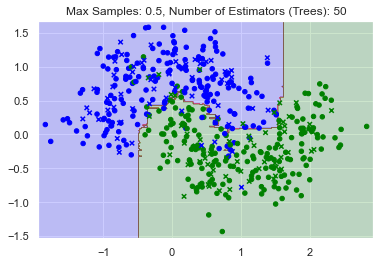

^^^ Train accuracy: 0.96, Test accuracy: 0.89 ^^^


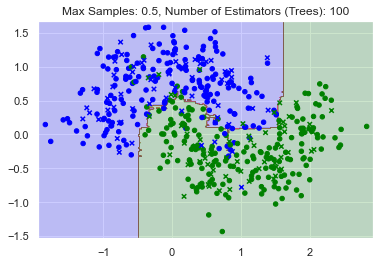

^^^ Train accuracy: 0.96, Test accuracy: 0.9 ^^^


In [8]:
for estimators in [1, 10, 25, 50, 100]:
    bag_plot_surface(X_train, X_test, y_train, y_test, max_samples=0.5, n_estimators=estimators)